In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [105]:
# Replace 'your_dataset.csv' with the dataset filename
df = pd.read_csv('/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv')
df.head()

try:
    data = pd.read_csv('/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv')
    print("Dataset successfully loaded!")
    print(data.head())
    print(data.info())
except FileNotFoundError:
    print("The file path is incorrect. Please verify the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset successfully loaded!
  roll_no gender race_ethnicity parental_level_of_education  lunch  \
0  std-01   male        group D                some college    1.0   
1  std-02   male        group B                 high school    1.0   
2  std-03   male        group C             master's degree    1.0   
3  std-04   male        group D                some college    1.0   
4  std-05   male        group C                some college    0.0   

   test_preparation_course math_score  reading_score  writing_score  \
0                      1.0         89           38.0           85.0   
1                      0.0         65          100.0           67.0   
2                      0.0         10           99.0           97.0   
3                      1.0         22           51.0           41.0   
4                      1.0         26           58.0           64.0   

   science_score  total_score grade  
0           26.0        238.0     C  
1           96.0        328.0     A  
2        

In [106]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display column names
print("Column names:", df.columns.tolist())

# Examine data types and null values
df.info()

# Summary of numeric columns
df.describe()


Shape of the dataset: (10000, 12)
Column names: ['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'science_score', 'total_score', 'grade']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   scien

,lunch,test_preparation_course,reading_score,writing_score,science_score,total_score
count,9976.000000,9977.000000,9975.000000,9976.000000,9977.000000,9981.000000
mean,0.644246,0.388694,70.125915,71.415798,66.063045,264.740908
std,0.478765,0.487478,19.026245,18.245360,19.324331,42.304858
min,0.000000,0.000000,17.000000,10.000000,9.000000,89.000000
25%,0.000000,0.000000,57.000000,59.000000,53.000000,237.000000
50%,1.000000,0.000000,71.000000,72.500000,67.000000,268.000000
75%,1.000000,1.000000,85.000000,85.000000,81.000000,294.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000,383.000000


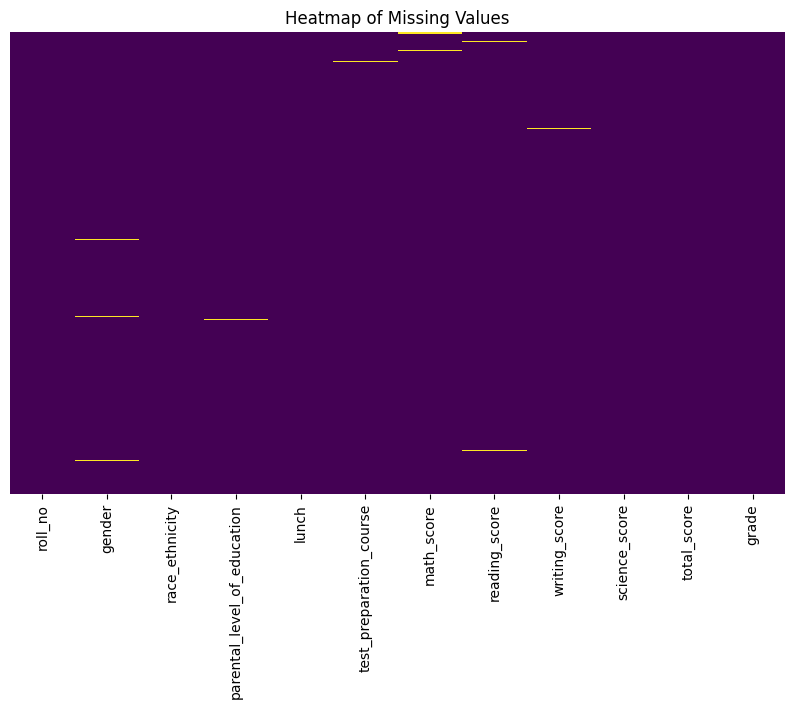

roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64

In [107]:
# Visualizing missing data patterns using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()


# Checking missing values count
data.isnull().sum()


In [108]:
# Impute missing values for numeric columns using the mean
numeric_cols = ['lunch', 'test_preparation_course', 'reading_score', 
                'writing_score', 'science_score', 'total_score']
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Impute missing values for categorical columns using the mode
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'grade']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Handle missing roll_no with a placeholder
data['roll_no'] = data['roll_no'].fillna('Unknown')

# Convert math_score to numeric and handle invalid entries
data['math_score'] = pd.to_numeric(data['math_score'], errors='coerce')
data['math_score'] = data['math_score'].fillna(data['math_score'].mean())

# Verify no missing values remain
data.isnull().sum()


roll_no                        0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64

In [109]:
# Check for duplicate rows
print("Number of duplicate rows:", data.duplicated().sum())

# Drop duplicates if any
data = data.drop_duplicates()

# Verify the shape of the dataset
print("Shape after removing duplicates:", data.shape)


Number of duplicate rows: 0
Shape after removing duplicates: (10000, 12)


In [110]:
# Check unique values for categorical columns
print("Unique values in 'gender':", data['gender'].unique())
print("Unique values in 'race_ethnicity':", data['race_ethnicity'].unique())
print("Unique values in 'grade':", data['grade'].unique())

# Check for invalid numeric values
print("Describe 'math_score':")
print(data['math_score'].describe())


Unique values in 'gender': ['male' 'female' 'Boy' '\\tmale' 'Girl']
Unique values in 'race_ethnicity': ['group D' 'group B' 'group C' 'group E' 'group A' 'A' 'C' 'D'
 'group C\\n' 'B' 'E']
Unique values in 'grade': ['C' 'A' 'B' 'D' 'Fail']
Describe 'math_score':
count    10000.000000
mean        57.178747
std         21.720060
min          0.000000
25%         41.000000
50%         58.000000
75%         73.000000
max        100.000000
Name: math_score, dtype: float64


gender
female    5001
male      4982
Girl        10
Boy          6
\tmale       1
Name: count, dtype: int64
grade
B       5662
C       2701
A        904
D        671
Fail      62
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


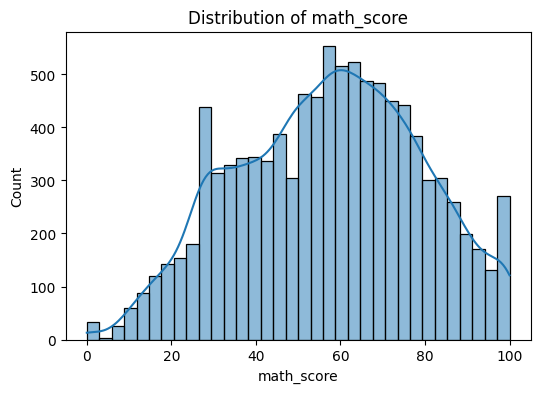

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


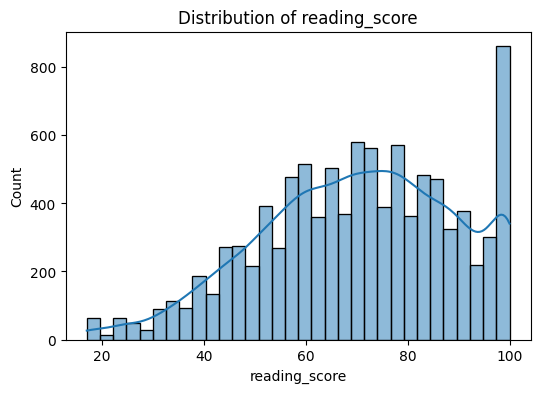

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


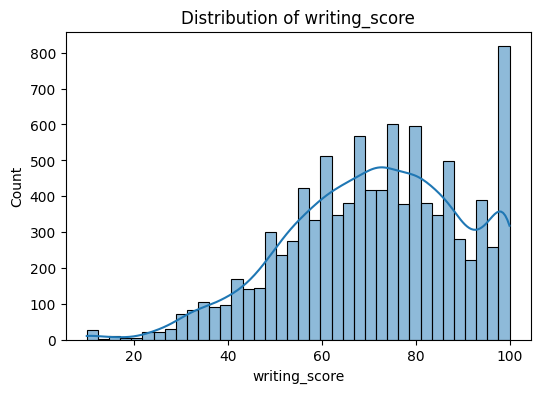

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


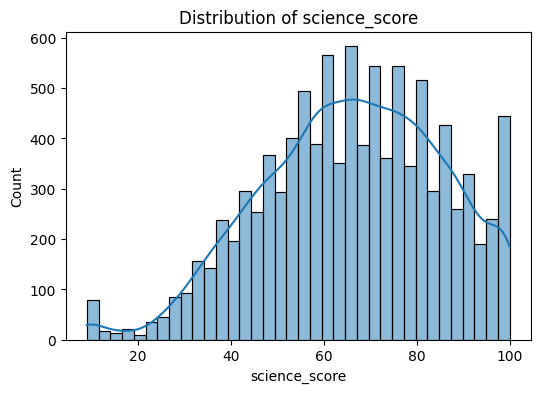

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


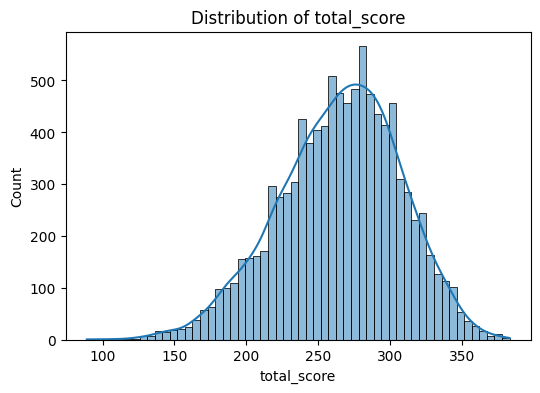

In [111]:
# Distribution of categorical variables
print(data['gender'].value_counts())
print(data['grade'].value_counts())

# Plot histograms for numeric variables
numeric_cols = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


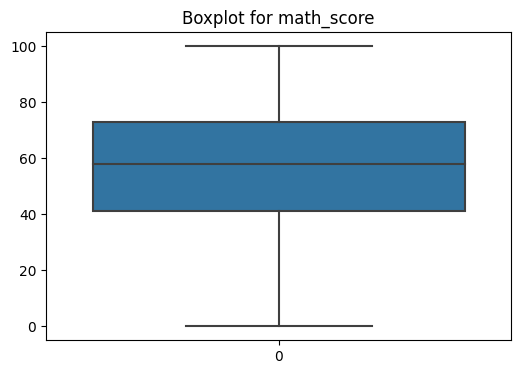

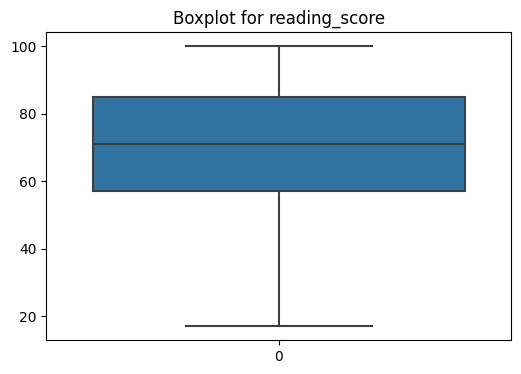

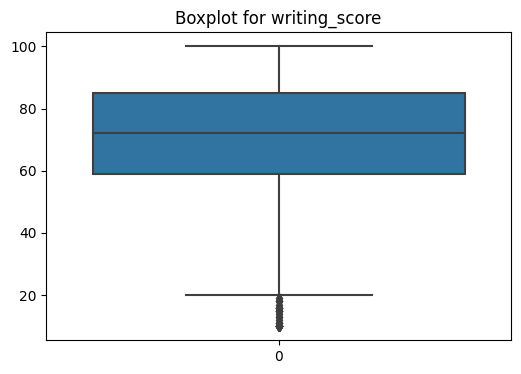

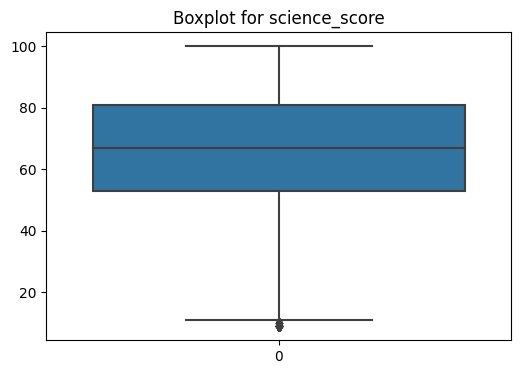

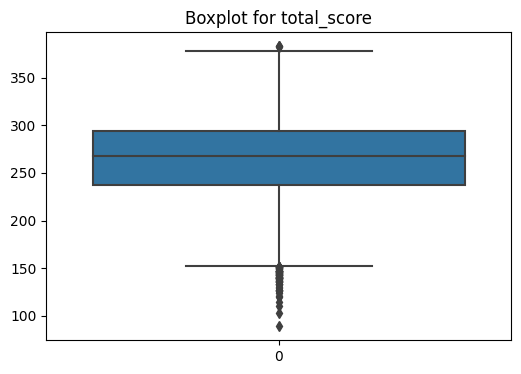

In [112]:
# Box plots for detecting outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Optionally: Handle outliers using IQR or capping (not shown here)


In [113]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['gender', 'race_ethnicity', 'grade'], drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()


,roll_no,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,gender_Girl,...,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group C\n,race_ethnicity_group D,race_ethnicity_group E,grade_B,grade_C,grade_D,grade_Fail
0,std-01,some college,1.0,1.0,89.0,38.0,85.0,26.0,238.0,False,...,False,False,False,False,True,False,False,True,False,False
1,std-02,high school,1.0,0.0,65.0,100.0,67.0,96.0,328.0,False,...,False,True,False,False,False,False,False,False,False,False
2,std-03,master's degree,1.0,0.0,10.0,99.0,97.0,58.0,264.0,False,...,False,False,True,False,False,False,True,False,False,False
3,std-04,some college,1.0,1.0,22.0,51.0,41.0,84.0,198.0,False,...,False,False,False,False,True,False,False,False,True,False
4,std-05,some college,0.0,1.0,26.0,58.0,64.0,65.0,213.0,False,...,False,False,True,False,False,False,False,True,False,False


In [114]:
print(data_encoded.dtypes)
non_numeric_cols = data_encoded.select_dtypes(exclude='number').columns
print("Non-numeric columns:", non_numeric_cols)
data_encoded = data_encoded.select_dtypes(include='number')


roll_no                         object
parental_level_of_education     object
lunch                          float64
test_preparation_course        float64
math_score                     float64
reading_score                  float64
writing_score                  float64
science_score                  float64
total_score                    float64
gender_Girl                       bool
gender_\tmale                     bool
gender_female                     bool
gender_male                       bool
race_ethnicity_B                  bool
race_ethnicity_C                  bool
race_ethnicity_D                  bool
race_ethnicity_E                  bool
race_ethnicity_group A            bool
race_ethnicity_group B            bool
race_ethnicity_group C            bool
race_ethnicity_group C\n          bool
race_ethnicity_group D            bool
race_ethnicity_group E            bool
grade_B                           bool
grade_C                           bool
grade_D                  

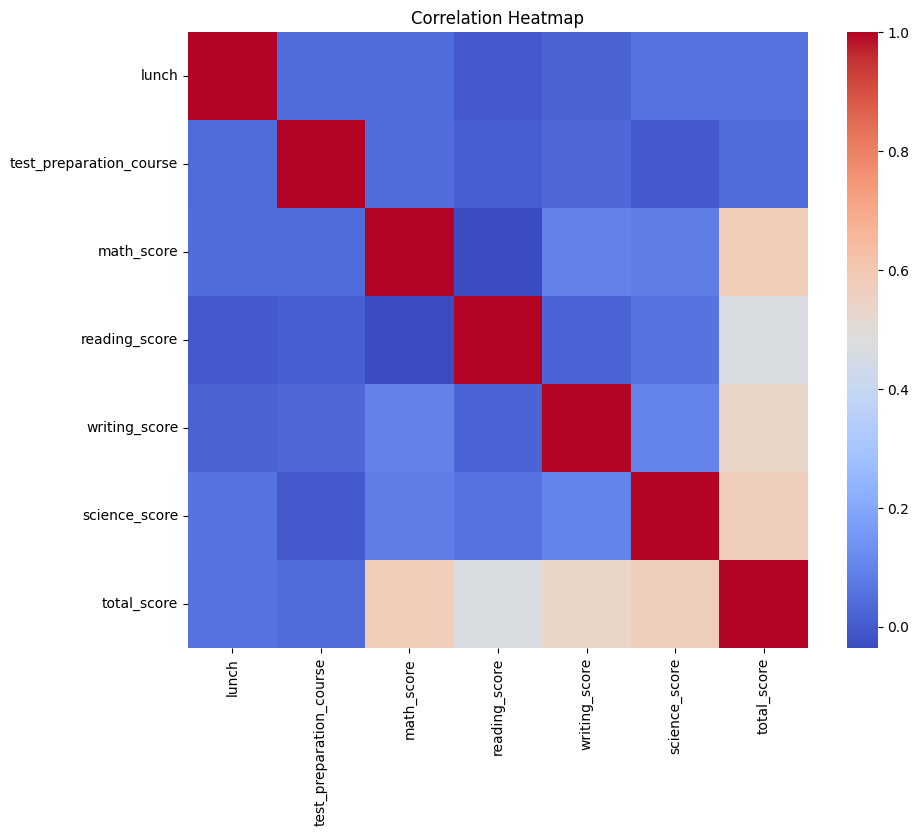

In [115]:
# Compute correlation matrix
correlation_matrix = data_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


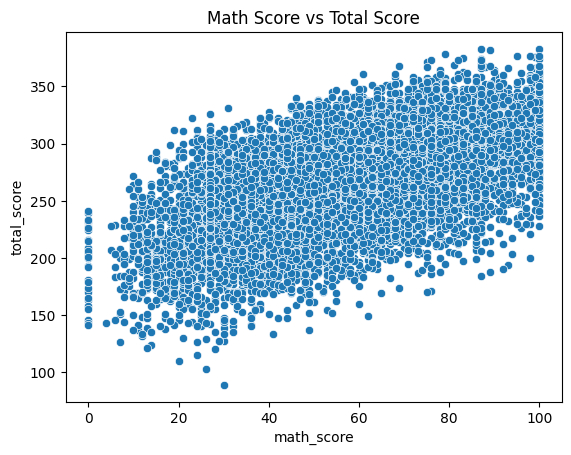

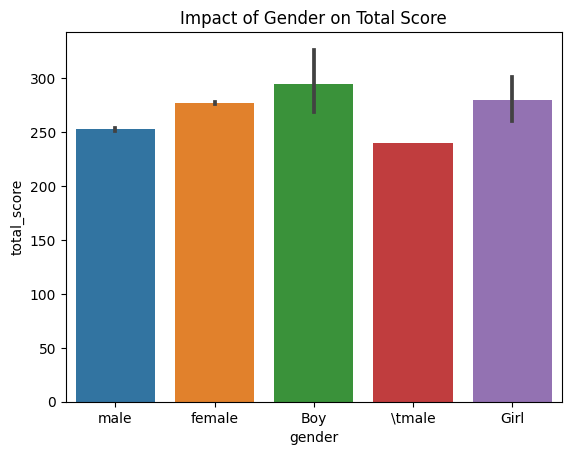

In [116]:
# Scatter plot for relationships between numeric variables
sns.scatterplot(x='math_score', y='total_score', data=data)
plt.title("Math Score vs Total Score")
plt.show()

# Bar plot to analyze the impact of 'gender' on 'total_score'
sns.barplot(x='gender', y='total_score', data=data)
plt.title("Impact of Gender on Total Score")
plt.show()


In [117]:
#  Add a new feature: performance_ratio
# Assuming max_score is 500
max_score = 500

# Create a performance ratio column
data['performance_ratio'] = data['total_score'] / max_score
print("New Feature 'performance_ratio' added:")
print(data[['total_score', 'performance_ratio']].head())


New Feature 'performance_ratio' added:
   total_score  performance_ratio
0        238.0              0.476
1        328.0              0.656
2        264.0              0.528
3        198.0              0.396
4        213.0              0.426


In [118]:
#  Bin performance_ratio into categories (Low, Medium, High)
bins = [0, 0.5, 0.75, 1.0]
labels = ['Low', 'Medium', 'High']
data['performance_category'] = pd.cut(data['performance_ratio'], bins=bins, labels=labels)

print("Binned 'performance_ratio' into categories:")
print(data[['performance_ratio', 'performance_category']].head())


Binned 'performance_ratio' into categories:
   performance_ratio performance_category
0              0.476                  Low
1              0.656               Medium
2              0.528               Medium
3              0.396                  Low
4              0.426                  Low


In [119]:
#Summarize the new feature
# Summary statistics of performance_ratio
performance_summary = data['performance_ratio'].describe()
print("Summary of Performance Ratio:")
print(performance_summary)

# Count of students in each performance category
category_counts = data['performance_category'].value_counts()
print("\nPerformance Categories Distribution:")
print(category_counts)


Summary of Performance Ratio:
count    10000.000000
mean         0.529482
std          0.084529
min          0.178000
25%          0.474000
50%          0.536000
75%          0.588000
max          0.766000
Name: performance_ratio, dtype: float64

Performance Categories Distribution:
performance_category
Medium    6487
Low       3505
High         8
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


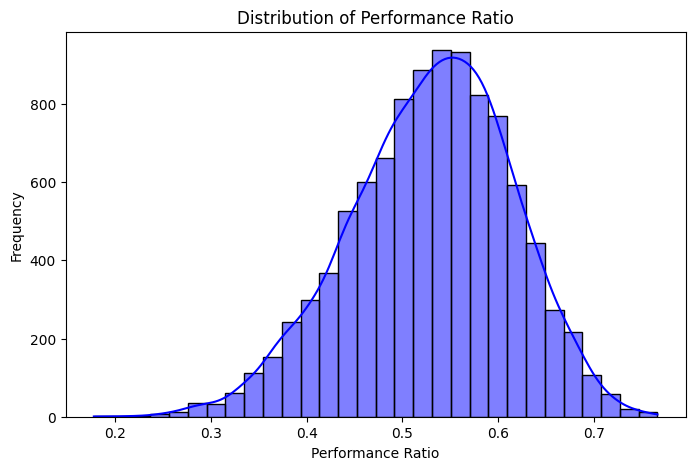

In [120]:
#Visualize the distribution of performance_ratio
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(data['performance_ratio'], bins=30, kde=True, color='blue')
plt.title('Distribution of Performance Ratio')
plt.xlabel('Performance Ratio')
plt.ylabel('Frequency')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


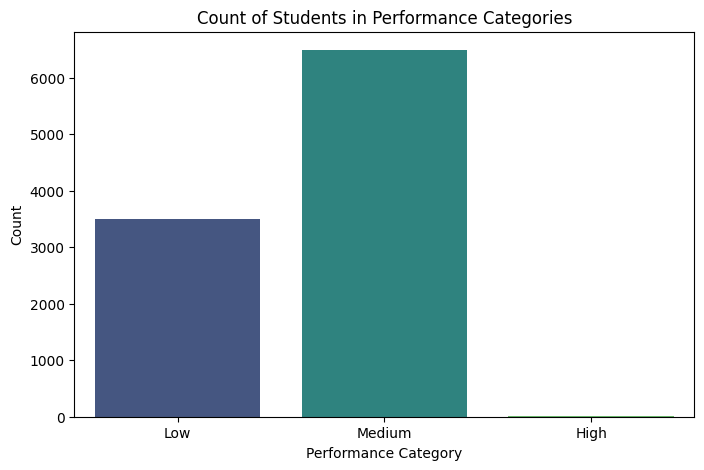

In [121]:
#Visualize the count of students in each performance category
plt.figure(figsize=(8, 5))
sns.countplot(x='performance_category', data=data, palette='viridis')
plt.title('Count of Students in Performance Categories')
plt.xlabel('Performance Category')
plt.ylabel('Count')
plt.show()
